In [2]:
import sys
sys.path.append('../src') # include the src directory


In [3]:
import pandas as pd
from visualization import plot_label_distribution


# Data 

In [4]:
raw_file_path = '../data/raw/amyloid-raw-30-07-2025.csv'
raw_df = pd.read_csv(raw_file_path)
raw_df.head()

,PMID,Rejection?,If so; reason to reject?,Other? Expand,No access to full-text,Decided by what?,URL,Year,Year.1,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,39441361,Rejected,(Pre)Clinical trials. No interaction or amyloi...,NaN,NaN,NaN,https://pubmed.ncbi.nlm.nih.gov/39441361/,2025,NaN,NaN,NaN,Open questions:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39438925,Rejected,Not enough experimental data,NaN,NaN,read whole paper,https://pubmed.ncbi.nlm.nih.gov/39438925/,NaN,NaN,NaN,NaN,1) How do we consider an antibody used to dete...,NaN,Not enough experimental data. Same for isolati...,NaN,NaN,NaN,NaN,NaN
2,39438516,Rejected,"The interactor is not an Ab, Unknown antibody ...",NaN,NaN,NaN,https://pubmed.ncbi.nlm.nih.gov/39438516/,NaN,NaN,NaN,NaN,2) What about Pre-prints?,NaN,No to pre-prints,NaN,NaN,NaN,NaN,NaN
3,39434125,Rejected,There are no interactions described,NaN,NaN,NaN,https://pubmed.ncbi.nlm.nih.gov/39434125/,NaN,NaN,NaN,NaN,3) Non-English papers? I would trust automatic...,NaN,No to Non-Englishs,NaN,NaN,NaN,NaN,NaN
4,39432414,Rejected,Review article,NaN,NaN,Only abstract,https://pubmed.ncbi.nlm.nih.gov/39432414/,NaN,NaN,NaN,NaN,4) There are doubles. Excluding them?,NaN,Remove them,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_df['Rejection?'].unique()

array(['Rejected', 'Useful', nan, '?'], dtype=object)

In [6]:
file_path = '../data/processed/amyloid-30-07-2025.csv'
df = pd.read_csv(file_path)
df.head()



,PMID,rejection,reason,decision,Title,Abstract,Authors,Journal,References
0,39441361,Rejected,(Pre)Clinical trials. No interaction or amyloi...,NaN,Monoclonal anti-amyloid antibody treatment: th...,The development of monoclonal anti-amyloid ant...,"['Lee S', 'Stögmann E']",Wiener klinische Wochenschrift,"['36449413', '33720637', '35652476', '31205802..."
1,39438925,Rejected,Not enough experimental data,read whole paper,Blockade of brain alkaline phosphatase efficie...,Alzheimer's disease (AD) is the most prevalent...,"['Soria-Tobar L', 'Román-Valero L', 'Sebastián...",Alzheimer's research & therapy,"['11520930', '11274343', '12824062', '9530504'..."
2,39438516,Rejected,"The interactor is not an Ab, Unknown antibody ...",NaN,Thioflavin-T: application as a neuronal body a...,Thioflavin-T (THT) is a common and indispensab...,"['Min JH', 'Sarlus H', 'Oasa S', 'Harris RA']",Scientific reports,"['20399286', '30108983', '28280572', '2729542'..."
3,39434125,Rejected,There are no interactions described,NaN,Amyloid-β (Aβ) immunotherapy induced microhemo...,Anti-amyloid-β (Aβ) immunotherapy trials have ...,"['Taylor X', 'Noristani HN', 'Fitzgerald GJ', ...",Molecular neurodegeneration,"['3159021', '33720637', '36449413', '35542991'..."
4,39426463,Rejected,Not enough experimental data,NaN,Early divergent modulation of NLRP2's and NLRP...,"Alzheimer's disease (AD), the most prevalent h...","['Chiarini A', 'Armato U', 'Gui L', 'Yin M', '...",Brain research,[]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PMID        1702 non-null   int64 
 1   rejection   1702 non-null   object
 2   reason      1579 non-null   object
 3   decision    1522 non-null   object
 4   Title       1702 non-null   object
 5   Abstract    1684 non-null   object
 6   Authors     1702 non-null   object
 7   Journal     1702 non-null   object
 8   References  1702 non-null   object
dtypes: int64(1), object(8)
memory usage: 119.8+ KB


# Empty references in PUBMED

In [8]:

empty_refs = df['References'].isna() | (df['References'].astype(str).str.strip() == '') | (df['References'].astype(str).str.strip() == '[]')
print("Number of records with empy references:", empty_refs.sum())


Number of records with empy references: 545


# Label distribution

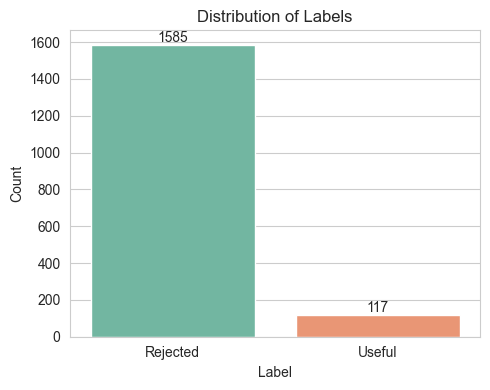

In [9]:
plot_label_distribution(df, 'rejection', title='Distribution of Labels', xlabel="Label", figsize=(5 ,4))

In [10]:
counts = df['rejection'].value_counts()/len(df)
counts

rejection
Rejected    0.931257
Useful      0.068743
Name: count, dtype: float64

# Merge raw with fetch data

In [11]:
df_pubmed = pd.read_csv('../data/fetched/pubmed-amyloid-21-07-2025.csv')
df_pubmed.columns = [col.lower() for col in df_pubmed.columns]

df_ref = pd.read_csv('../data/fetched/ref-amyloid-21-07-2025.csv')
df_50k_ref = pd.read_csv('../data/fetched/50k-ref-amyloid-21-07-2025.csv')


In [12]:

mask_letters = df_50k_ref['pmid'].astype(str).str.contains(r'[a-zA-Z]')
print(df_50k_ref.loc[mask_letters, 'pmid'].dropna())


936      PMC3251548
9805     PMC3087597
27116    PMC3575529
39625    PMC2904811
50249    PMC4339351
Name: pmid, dtype: object


## Manual correct wrong pmids

In [13]:

errors = ['PMC3251548', 'PMC3087597', 'PMC3575529', 'PMC2904811', 'PMC4339351']
correct = ["22152337", "19302484", "23420871", "20536124", "25716838"]



pmid_map = dict(zip(errors, correct))
df_50k_ref['pmid'] = df_50k_ref['pmid'].replace(pmid_map)

dataframes = [df_pubmed, df_ref, df_50k_ref]

In [158]:
for df in dataframes:
    df['references'] = df['references'].apply(eval)
df_50k_ref['references2'] = df_50k_ref['references2'].apply(eval)

In [154]:
print("df_pubmed")
print(df_pubmed.info())
print("\n")

print("df_ref")
print(df_ref.info())
print("\n")

print("df_50k_ref")
print(df_50k_ref.info())


df_pubmed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pmid        1601 non-null   int64 
 1   title       1601 non-null   object
 2   abstract    1586 non-null   object
 3   authors     1601 non-null   object
 4   journal     1601 non-null   object
 5   references  1601 non-null   object
dtypes: int64(1), object(5)
memory usage: 75.2+ KB
None


df_ref
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pmid         1601 non-null   int64 
 1   references   1601 non-null   object
 2   references2  1601 non-null   object
dtypes: int64(1), object(2)
memory usage: 37.7+ KB
None


df_50k_ref
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50466 entries, 0 to 50465
Data columns (total 5 columns):
 #   Column

In [162]:

id_to_pmid = df_50k_ref.set_index('openalex_id')['pmid'].dropna().to_dict()

def map_to_pmids(openalex_list):
    if isinstance(openalex_list, list):
        return [id_to_pmid[oa_id] for oa_id in openalex_list if oa_id in id_to_pmid and pd.notna(id_to_pmid[oa_id])]
    return []

df_50k_ref['references2'] = df_50k_ref['references'].apply(map_to_pmids)
df_ref['references2'] = df_ref['references'].apply(map_to_pmids)


In [164]:
df_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pmid         1601 non-null   int64 
 1   references   1601 non-null   object
 2   references2  1601 non-null   object
dtypes: int64(1), object(2)
memory usage: 37.7+ KB


In [167]:
df_50k_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50466 entries, 0 to 50465
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   openalex_id  50466 non-null  object
 1   pmid         47734 non-null  object
 2   doi          49516 non-null  object
 3   references   50466 non-null  object
 4   references2  50466 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [169]:
df1 = df_ref.copy()
df2 = df_50k_ref.copy()
df2.dropna(subset=['pmid'], inplace=True)


df2['pmid'] = pd.to_numeric(df2['pmid'], errors='coerce')


df1_sel = df1[['pmid', 'references2']]
df2_sel = df2[['pmid', 'references2']]


df_all = pd.concat([df1_sel, df2_sel], ignore_index=True)


In [181]:
# Drop NaN values in 'pmid' (may occur due to conversion)
df_all = df_all.dropna(subset=['pmid'])

# Remove duplicates based on 'pmid' — keeps the first occurrence
df_all = df_all.drop_duplicates(subset='pmid')

# Optional: convert 'pmid' back to int
df_all['pmid'] = df_all['pmid'].astype(int)
df_all = df_all.rename(columns={'references2': 'references'})
df_all['num_of_refs'] = df_all['references'].apply(len)

# Result:
df_all

,pmid,references,num_of_refs
0,39441361,"[25988462, 30126885, 31205802, 32463065, 33720...",10
1,39438925,"[26219715, 23427088, 15039209, 25193238, 11337...",62
2,39438516,"[23638278, 22528106, 23136640, 23747341, 19502...",53
3,39434125,"[10411341, 25735919, 19822028, 3159021, 180222...",26
4,39426463,"[11160457, 21148344, 23625868, 20854368, 16052...",117
...,...,...,...
49330,18436720,"[10536818, 15593206, 16943388, 17553524, 11485...",9
49331,3625275,[],0
49332,12097789,"[8424174, 8191290, 8564851, 9143704, 2566117]",5
49333,31252016,[],0


# References

In [14]:
refs = pd.read_csv('../data/fetched/50k-good-refs.csv', index_col=0)
refs['references'] = refs['references'].apply(eval)

In [15]:
refs['references'][0]

['25988462',
 '30126885',
 '31205802',
 '32463065',
 '33720637',
 '35652476',
 '36028322',
 '36449413',
 '37357276',
 '37090988']

In [16]:
df_pubmed = pd.read_csv('../data/fetched/pubmed-amyloid-21-07-2025.csv')
df_pubmed.columns = [col.lower() for col in df_pubmed.columns]
df_pubmed['references'] = df_pubmed['references'].apply(eval)
df_pubmed.rename(columns={"references": "ref"}, inplace=True)
df_pubmed['num_of_ref'] = df_pubmed['ref'].apply(len)
df_pubmed


,pmid,title,abstract,authors,journal,ref,num_of_ref
0,39441361,Monoclonal anti-amyloid antibody treatment: th...,The development of monoclonal anti-amyloid ant...,"['Lee S', 'Stögmann E']",Wiener klinische Wochenschrift,"[36449413, 33720637, 35652476, 31205802, 29282...",10
1,39438925,Blockade of brain alkaline phosphatase efficie...,Alzheimer's disease (AD) is the most prevalent...,"['Soria-Tobar L', 'Román-Valero L', 'Sebastián...",Alzheimer's research & therapy,"[11520930, 11274343, 12824062, 9530504, 290894...",61
2,39438516,Thioflavin-T: application as a neuronal body a...,Thioflavin-T (THT) is a common and indispensab...,"['Min JH', 'Sarlus H', 'Oasa S', 'Harris RA']",Scientific reports,"[20399286, 30108983, 28280572, 2729542, 205830...",54
3,39434125,Amyloid-β (Aβ) immunotherapy induced microhemo...,Anti-amyloid-β (Aβ) immunotherapy trials have ...,"['Taylor X', 'Noristani HN', 'Fitzgerald GJ', ...",Molecular neurodegeneration,"[3159021, 33720637, 36449413, 35542991, 156606...",26
4,39426463,Early divergent modulation of NLRP2's and NLRP...,"Alzheimer's disease (AD), the most prevalent h...","['Chiarini A', 'Armato U', 'Gui L', 'Yin M', '...",Brain research,[],0
...,...,...,...,...,...,...,...
1596,25501811,The dynamic conformational landscape of gamma-...,The structure and function of the gamma-secret...,"['Elad N', 'De Strooper B', 'Lismont S', 'Hage...",Journal of cell science,"[24338474, 11719200, 21597003, 18298083, 15772...",57
1597,25023329,Chaperone nanobodies protect gelsolin against ...,Gelsolin amyloidosis is an autosomal dominant ...,"['Van Overbeke W', 'Verhelle A', 'Everaert I',...",Molecular therapy : the journal of the America...,"[9356260, 16302959, 17846922, 1338910, 4543600...",47
1598,23904325,Structure of an early native-like intermediate...,To investigate early intermediates of β2-micro...,"['Vanderhaegen S', 'Fislage M', 'Domanska K', ...",Protein science : a publication of the Protein...,"[10412375, 16715043, 12942175, 16756495, 21220...",53
1599,22344635,Self-assembled amyloid-like oligomeric-cohesin...,"In this study, a molecular self-assembly strat...","['Han Z', 'Zhang B', 'Wang YE', 'Zuo YY', 'Su ...",Applied and environmental microbiology,"[11959975, 12917441, 11075358, 18537542, 12065...",29


In [17]:
df = pd.merge(df_pubmed, refs, on="pmid", how="left")

In [18]:
df


,pmid,title,abstract,authors,journal,ref,num_of_ref,references,num_of_refs
0,39441361,Monoclonal anti-amyloid antibody treatment: th...,The development of monoclonal anti-amyloid ant...,"['Lee S', 'Stögmann E']",Wiener klinische Wochenschrift,"[36449413, 33720637, 35652476, 31205802, 29282...",10,"[25988462, 30126885, 31205802, 32463065, 33720...",10
1,39438925,Blockade of brain alkaline phosphatase efficie...,Alzheimer's disease (AD) is the most prevalent...,"['Soria-Tobar L', 'Román-Valero L', 'Sebastián...",Alzheimer's research & therapy,"[11520930, 11274343, 12824062, 9530504, 290894...",61,"[26219715, 23427088, 15039209, 25193238, 11337...",62
2,39438516,Thioflavin-T: application as a neuronal body a...,Thioflavin-T (THT) is a common and indispensab...,"['Min JH', 'Sarlus H', 'Oasa S', 'Harris RA']",Scientific reports,"[20399286, 30108983, 28280572, 2729542, 205830...",54,"[23638278, 22528106, 23136640, 23747341, 19502...",53
3,39434125,Amyloid-β (Aβ) immunotherapy induced microhemo...,Anti-amyloid-β (Aβ) immunotherapy trials have ...,"['Taylor X', 'Noristani HN', 'Fitzgerald GJ', ...",Molecular neurodegeneration,"[3159021, 33720637, 36449413, 35542991, 156606...",26,"[10411341, 25735919, 19822028, 3159021, 180222...",26
4,39426463,Early divergent modulation of NLRP2's and NLRP...,"Alzheimer's disease (AD), the most prevalent h...","['Chiarini A', 'Armato U', 'Gui L', 'Yin M', '...",Brain research,[],0,"[11160457, 21148344, 23625868, 20854368, 16052...",117
...,...,...,...,...,...,...,...,...,...
1596,25501811,The dynamic conformational landscape of gamma-...,The structure and function of the gamma-secret...,"['Elad N', 'De Strooper B', 'Lismont S', 'Hage...",Journal of cell science,"[24338474, 11719200, 21597003, 18298083, 15772...",57,"[10864326, 10206644, 25043039, 16546128, 22505...",58
1597,25023329,Chaperone nanobodies protect gelsolin against ...,Gelsolin amyloidosis is an autosomal dominant ...,"['Van Overbeke W', 'Verhelle A', 'Everaert I',...",Molecular therapy : the journal of the America...,"[9356260, 16302959, 17846922, 1338910, 4543600...",47,"[23818458, 17846922, 22013955, 24155256, 16281...",47
1598,23904325,Structure of an early native-like intermediate...,To investigate early intermediates of β2-micro...,"['Vanderhaegen S', 'Fislage M', 'Domanska K', ...",Protein science : a publication of the Protein...,"[10412375, 16715043, 12942175, 16756495, 21220...",53,"[10331874, 21782416, 16491092, 21255727, 10944...",52
1599,22344635,Self-assembled amyloid-like oligomeric-cohesin...,"In this study, a molecular self-assembly strat...","['Han Z', 'Zhang B', 'Wang YE', 'Zuo YY', 'Su ...",Applied and environmental microbiology,"[11959975, 12917441, 11075358, 18537542, 12065...",29,"[21601098, 11060838, 11075358, 20438772, 11959...",29


## Empty references comparison

In [23]:
print('pubmed')
print(sum(df['num_of_ref']==0))
print(sum(df['num_of_ref']==0) / 1601)

print('\nopenalex')
print(sum(df['num_of_refs']==0))
print(sum(df['num_of_refs']==0) / 1601)


pubmed
506
0.316052467207995

openalex
52
0.03247970018738289
